In [11]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [12]:
%%R
install.packages("ggplot2")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.5.2.tar.gz'
Content type 'application/x-gzip' length 3580451 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/tmp/RtmpB5IehE/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/corrplot_0.95.tar.gz'
Content type 'application/x-gzip' length 3745190 bytes (3.6 MB)
downloaded 3.6 MB


The downloaded source packages are in
	‘/tmp/RtmpB5IehE/downloaded_packages’


In [13]:
from google.colab import files
uploaded = files.upload()

Saving monthly_sales.csv to monthly_sales (1).csv


In [14]:
%%R
data <- read.csv("monthly_sales.csv")
head(data)

  order_date monthly_sales
1 2014-01-31     14236.895
2 2014-02-28      4519.892
3 2014-03-31     55691.009
4 2014-04-30     28295.345
5 2014-05-31     23648.287
6 2014-06-30     34595.128


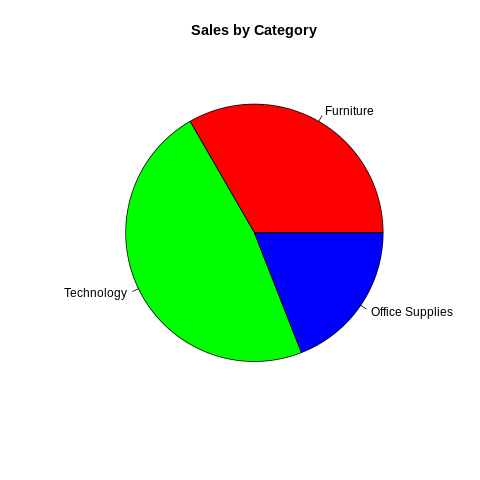

In [15]:
%%R
# Simulate categories
categories <- c("Furniture", "Technology", "Office Supplies")
values <- c(35000, 50000, 20000)
pie(values, labels=categories, main="Sales by Category", col=rainbow(3))


In [17]:
%%R
data <- read.csv("monthly_sales.csv")
names(data)

[1] "order_date"    "monthly_sales"


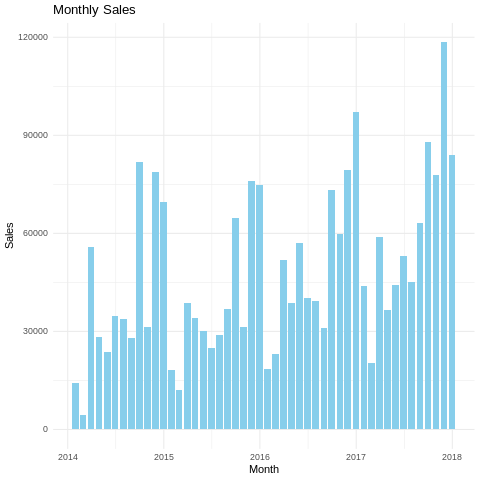

In [18]:
%%R
# Load data
data <- read.csv("monthly_sales.csv")

# Convert 'order_date' to Date
data$order_date <- as.Date(data$order_date)

# Plot
library(ggplot2)
ggplot(data, aes(x=order_date, y=monthly_sales)) +
  geom_col(fill='skyblue') +
  theme_minimal() +
  labs(title="Monthly Sales", x="Month", y="Sales")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/corrplot_0.95.tar.gz'
Content type 'application/x-gzip' length 3745190 bytes (3.6 MB)
downloaded 3.6 MB


The downloaded source packages are in
	‘/tmp/RtmpB5IehE/downloaded_packages’
corrplot 0.95 loaded


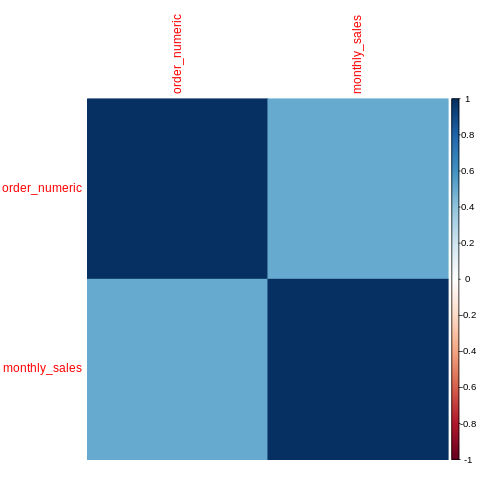

In [19]:
%%R
# Install if not already installed
install.packages("corrplot")
library(corrplot)

# Load and prepare data
data <- read.csv("monthly_sales.csv")

# Convert order_date to Date, then to numeric
data$order_date <- as.Date(data$order_date)
data$order_numeric <- as.numeric(data$order_date)

# Keep only numeric columns
num_data <- data[c("order_numeric", "monthly_sales")]

# Correlation matrix
cor_matrix <- cor(num_data)

# Plot
corrplot(cor_matrix, method="color", tl.cex=1)


In [20]:
%%R
# Load dataset
data <- read.csv("monthly_sales.csv")

# Convert order_date to Date, then numeric
data$order_date <- as.Date(data$order_date)
data$order_numeric <- as.numeric(data$order_date)

# Fit linear regression model
model <- lm(monthly_sales ~ order_numeric, data = data)
summary(model)



Call:
lm(formula = monthly_sales ~ order_numeric, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-39712 -14654  -4206  15528  50284 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -4.505e+05  1.268e+05  -3.553 0.000894 ***
order_numeric  2.964e+01  7.539e+00   3.931 0.000282 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22030 on 46 degrees of freedom
Multiple R-squared:  0.2515,	Adjusted R-squared:  0.2352 
F-statistic: 15.46 on 1 and 46 DF,  p-value: 0.0002822



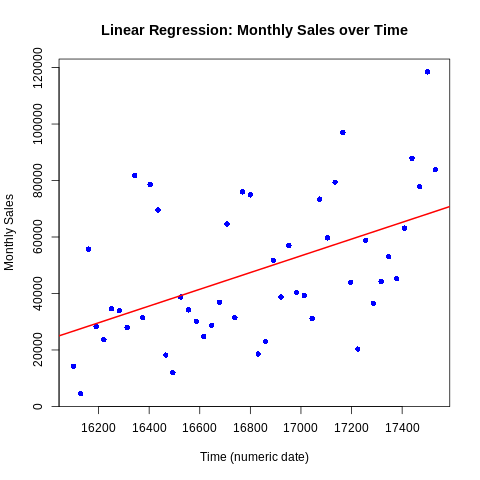

In [21]:
%%R
# Plot actual data
plot(data$order_numeric, data$monthly_sales,
     main = "Linear Regression: Monthly Sales over Time",
     xlab = "Time (numeric date)",
     ylab = "Monthly Sales",
     pch = 16, col = "blue")

# Add regression line
abline(model, col = "red", lwd = 2)
